# 영문 Word Cloud
- 미국 독립 선언문
- 언어학부분, 이미지부분, 머신러닝부분 다 학회가 틀려서 용어가 다름!

In [1]:
# wordcloud 설치
#!pip install wordcloud

In [2]:
# NLTK(Natural Language Toolkit) : 자연어 처리 패키지
#불용어 : stopwords, 위에는 영어쪽 단어들
# 언어학에서 사용하는 용어들 : pickle
# corpus : 말뭉치(corpus)는 자연어 분석 작업을 위해 만든 샘플 문서 집합
import nltk
import pickle
from nltk.corpus import stopwords
import re

# 경로 알려주니까 사용 안하면 지우고 나중에 사용할때 다시 설치해도 됨.
nltk.download('all')

[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to
[nltk_data]    |     C:\Users\yejin\AppData\Roaming\nltk_data...
[nltk_data]    |   Package abc is already up-to-date!
[nltk_data]    | Downloading package alpino to
[nltk_data]    |     C:\Users\yejin\AppData\Roaming\nltk_data...
[nltk_data]    |   Package alpino is already up-to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger to
[nltk_data]    |     C:\Users\yejin\AppData\Roaming\nltk_data...
[nltk_data]    |   Package averaged_perceptron_tagger is already up-
[nltk_data]    |       to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger_ru to
[nltk_data]    |     C:\Users\yejin\AppData\Roaming\nltk_data...
[nltk_data]    |   Package averaged_perceptron_tagger_ru is already
[nltk_data]    |       up-to-date!
[nltk_data]    | Downloading package basque_grammars to
[nltk_data]    |     C:\Users\yejin\AppData\Roaming\nltk_data...
[nltk_data]    | 

True

## text를 불러 word분류

In [3]:
content = open("./data/Independence.txt").read()
content

'When in the Course of human events, it becomes necessary for one people to dissolve the political bands which have connected them with another, and to assume among the powers of the earth, the separate and equal station to which the Laws of Nature and of Nature\'s God entitle them, a decent respect to the opinions of mankind requires that they should declare the causes which impel them to the separation. \nWe hold these truths to be self-evident, that all men are created equal, that they are endowed by their Creator with certain unalienable Rights, that among these are Life, Liberty and the pursuit of Happiness. (Note: the original hand-written text ended on the phrase"the pursuit of property" rather than "the pursuit of Happiness" but the phrase was changed in subsequent copies in part because it was broader. The latter phrase is used today). \nThat to secure these rights, Governments are instituted among Men, deriving their just powers from the consent of the governed. That whenever

In [4]:
# 불필요한 심벌 없애기
# cleaned_content = content.replace('!','').replace(",",'') # 정리하기 힘드므로..
cleaned_content = re.sub('r[^\.\?\!\w\d\s]','',content) # 문장 단위로 끊기
cleaned_content 

'When in the Course of human events, it becomes necessary for one people to dissolve the political bands which have connected them with anothe and to assume among the powers of the earth, the separate and equal station to which the Laws of Nature and of Nature\'s God entitle them, a decent respect to the opinions of mankind requires that they should declare the causes which impel them to the separation. \nWe hold these truths to be self-evident, that all men are created equal, that they are endowed by their Creator with certain unalienable Rights, that among these are Life, Liberty and the pursuit of Happiness. (Note: the original hand-written text ended on the phrase"the pursuit of property" rather than "the pursuit of Happiness" but the phrase was changed in subsequent copies in part because it was broader. The latter phrase is used today). \nThat to secure these rights, Governments are instituted among Men, deriving their just powers from the consent of the governed. That whenever a

In [5]:
# 대문자를 소문자로 변화
cleaned_content = cleaned_content.lower()
cleaned_content

'when in the course of human events, it becomes necessary for one people to dissolve the political bands which have connected them with anothe and to assume among the powers of the earth, the separate and equal station to which the laws of nature and of nature\'s god entitle them, a decent respect to the opinions of mankind requires that they should declare the causes which impel them to the separation. \nwe hold these truths to be self-evident, that all men are created equal, that they are endowed by their creator with certain unalienable rights, that among these are life, liberty and the pursuit of happiness. (note: the original hand-written text ended on the phrase"the pursuit of property" rather than "the pursuit of happiness" but the phrase was changed in subsequent copies in part because it was broader. the latter phrase is used today). \nthat to secure these rights, governments are instituted among men, deriving their just powers from the consent of the governed. that whenever a

In [6]:
# 문장에서 워드를 토큰으로 쪼갠다.
word_tokens = nltk.word_tokenize(cleaned_content)
print(word_tokens)

['when', 'in', 'the', 'course', 'of', 'human', 'events', ',', 'it', 'becomes', 'necessary', 'for', 'one', 'people', 'to', 'dissolve', 'the', 'political', 'bands', 'which', 'have', 'connected', 'them', 'with', 'anothe', 'and', 'to', 'assume', 'among', 'the', 'powers', 'of', 'the', 'earth', ',', 'the', 'separate', 'and', 'equal', 'station', 'to', 'which', 'the', 'laws', 'of', 'nature', 'and', 'of', 'nature', "'s", 'god', 'entitle', 'them', ',', 'a', 'decent', 'respect', 'to', 'the', 'opinions', 'of', 'mankind', 'requires', 'that', 'they', 'should', 'declare', 'the', 'causes', 'which', 'impel', 'them', 'to', 'the', 'separation', '.', 'we', 'hold', 'these', 'truths', 'to', 'be', 'self-evident', ',', 'that', 'all', 'men', 'are', 'created', 'equal', ',', 'that', 'they', 'are', 'endowed', 'by', 'their', 'creator', 'with', 'certain', 'unalienable', 'rights', ',', 'that', 'among', 'these', 'are', 'life', ',', 'liberty', 'and', 'the', 'pursuit', 'of', 'happiness', '.', '(', 'note', ':', 'the', '

In [7]:
# 품사분리
token_pos = nltk.pos_tag(word_tokens)
print(token_pos)

[('when', 'WRB'), ('in', 'IN'), ('the', 'DT'), ('course', 'NN'), ('of', 'IN'), ('human', 'JJ'), ('events', 'NNS'), (',', ','), ('it', 'PRP'), ('becomes', 'VBZ'), ('necessary', 'JJ'), ('for', 'IN'), ('one', 'CD'), ('people', 'NNS'), ('to', 'TO'), ('dissolve', 'VB'), ('the', 'DT'), ('political', 'JJ'), ('bands', 'NNS'), ('which', 'WDT'), ('have', 'VBP'), ('connected', 'VBN'), ('them', 'PRP'), ('with', 'IN'), ('anothe', 'NN'), ('and', 'CC'), ('to', 'TO'), ('assume', 'VB'), ('among', 'IN'), ('the', 'DT'), ('powers', 'NNS'), ('of', 'IN'), ('the', 'DT'), ('earth', 'NN'), (',', ','), ('the', 'DT'), ('separate', 'JJ'), ('and', 'CC'), ('equal', 'JJ'), ('station', 'NN'), ('to', 'TO'), ('which', 'WDT'), ('the', 'DT'), ('laws', 'NNS'), ('of', 'IN'), ('nature', 'NN'), ('and', 'CC'), ('of', 'IN'), ('nature', 'NN'), ("'s", 'POS'), ('god', 'NN'), ('entitle', 'VBZ'), ('them', 'PRP'), (',', ','), ('a', 'DT'), ('decent', 'JJ'), ('respect', 'NN'), ('to', 'TO'), ('the', 'DT'), ('opinions', 'NNS'), ('of', '

In [8]:
# 명사만 추출하기
NN_words = []

for word,pos in token_pos:
    if 'NN' in pos:
        NN_words.append(word)
print(NN_words)

['course', 'events', 'people', 'bands', 'anothe', 'powers', 'earth', 'station', 'laws', 'nature', 'nature', 'god', 'respect', 'opinions', 'mankind', 'causes', 'separation', 'truths', 'men', 'creator', 'rights', 'life', 'liberty', 'pursuit', 'happiness', 'note', 'text', 'phrase', 'pursuit', 'property', 'pursuit', 'happiness', 'phrase', 'copies', 'part', 'phrase', 'today', 'rights', 'governments', 'men', 'powers', 'consent', 'form', 'government', 'becomes', 'ends', 'right', 'people', 'government', 'foundation', 'principles', 'powers', 'form', 'effect', 'safety', 'happiness', 'prudence', 'governments', 'light', 'causes', 'experience', 'mankind', 'evils', 'forms', 'train', 'abuses', 'usurpations', 'object', 'design', 'absolute', 'despotism', 'right', 'duty', 'government', 'guards', 'security', 'sufferance', 'colonies', 'necessity', 'systems', 'government', 'history', 'king', 'britain', 'history', 'injuries', 'usurpations', 'establishment', 'tyranny', 'states', 'facts', 'world', 'assent', '

In [9]:
# 원형으로 복원 => 복수형태의 단어를 원형으로....
wlem = nltk.WordNetLemmatizer()
lenmatized_words = []
for word in NN_words:
    new_word = wlem.lemmatize(word)
    lenmatized_words.append(new_word)
print(lenmatized_words)

['course', 'event', 'people', 'band', 'anothe', 'power', 'earth', 'station', 'law', 'nature', 'nature', 'god', 'respect', 'opinion', 'mankind', 'cause', 'separation', 'truth', 'men', 'creator', 'right', 'life', 'liberty', 'pursuit', 'happiness', 'note', 'text', 'phrase', 'pursuit', 'property', 'pursuit', 'happiness', 'phrase', 'copy', 'part', 'phrase', 'today', 'right', 'government', 'men', 'power', 'consent', 'form', 'government', 'becomes', 'end', 'right', 'people', 'government', 'foundation', 'principle', 'power', 'form', 'effect', 'safety', 'happiness', 'prudence', 'government', 'light', 'cause', 'experience', 'mankind', 'evil', 'form', 'train', 'abuse', 'usurpation', 'object', 'design', 'absolute', 'despotism', 'right', 'duty', 'government', 'guard', 'security', 'sufferance', 'colony', 'necessity', 'system', 'government', 'history', 'king', 'britain', 'history', 'injury', 'usurpation', 'establishment', 'tyranny', 'state', 'fact', 'world', 'assent', 'law', 'good', 'governor', 'law'

In [10]:
# 불용어 제거
stopwords_list = stopwords.words('english')
unique_NN_words = set(lenmatized_words) 
final_NN_words = lenmatized_words # 중복된 거 한 번에 빼기 위해서 

for word in unique_NN_words:
    if word in stopwords_list:
        while word in final_NN_words:
            final_NN_words.remove(word)

In [11]:
# 원하는 단어 제거 
customized_stopwords = ['be','today','yesterday',"it's","don't","others"]

unique_NN_words1 = set(final_NN_words)
for word in unique_NN_words1:
    if word in customized_stopwords:
        while word in final_NN_words:
            final_NN_words.remove(word)

In [12]:
# 빈도분석
from collections import Counter

c = Counter(final_NN_words)
print(c)

Counter({'people': 10, 'law': 9, 'government': 9, 'state': 9, 'power': 8, 'right': 7, 'time': 6, 'form': 4, 'colony': 4, 'assent': 4, 'legislature': 4, 'mankind': 3, 'life': 3, 'pursuit': 3, 'happiness': 3, 'phrase': 3, 'consent': 3, 'usurpation': 3, 'world': 3, 'justice': 3, 'peace': 3, 'act': 3, 'sea': 3, 'nature': 2, 'cause': 2, 'separation': 2, 'men': 2, 'part': 2, 'absolute': 2, 'necessity': 2, 'system': 2, 'history': 2, 'britain': 2, 'injury': 2, 'tyrant': 2, 'body': 2, 'purpose': 2, 'invasion': 2, 'condition': 2, 'judge': 2, 'office': 2, 'army': 2, 'jurisdiction': 2, 'trial': 2, 'inhabitant': 2, 'case': 2, 'rule': 2, 'protection': 2, 'circumstance': 2, 'age': 2, 'friend': 2, 'brother': 2, 'connection': 2, 'course': 1, 'event': 1, 'band': 1, 'anothe': 1, 'earth': 1, 'station': 1, 'god': 1, 'respect': 1, 'opinion': 1, 'truth': 1, 'creator': 1, 'liberty': 1, 'note': 1, 'text': 1, 'property': 1, 'copy': 1, 'becomes': 1, 'end': 1, 'foundation': 1, 'principle': 1, 'effect': 1, 'safety

In [13]:
print(c.most_common(20))

[('people', 10), ('law', 9), ('government', 9), ('state', 9), ('power', 8), ('right', 7), ('time', 6), ('form', 4), ('colony', 4), ('assent', 4), ('legislature', 4), ('mankind', 3), ('life', 3), ('pursuit', 3), ('happiness', 3), ('phrase', 3), ('consent', 3), ('usurpation', 3), ('world', 3), ('justice', 3)]


In [14]:
# 워드 클라우드
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import wordcloud

noun_text = ''
for word in final_NN_words:
    noun_text = noun_text + ' ' + word
noun_text

' course event people band anothe power earth station law nature nature god respect opinion mankind cause separation truth men creator right life liberty pursuit happiness note text phrase pursuit property pursuit happiness phrase copy part phrase right government men power consent form government becomes end right people government foundation principle power form effect safety happiness prudence government light cause experience mankind evil form train abuse usurpation object design absolute despotism right duty government guard security sufferance colony necessity system government history king britain history injury usurpation establishment tyranny state fact world assent law good governor law importance operation assent law accommodation district people people right representation legislature inestimable tyrant body place distant depository record purpose compliance measure house firmness invasion right people time dissolution power annihilation people exercise state remaining time

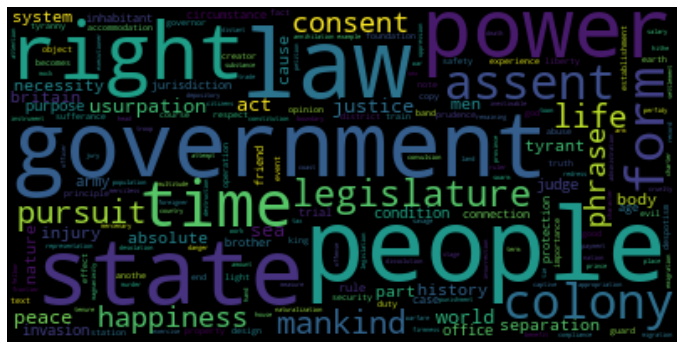

In [16]:
wordcloud = WordCloud(
    max_font_size = 60,
    relative_scaling=0.5
).generate(noun_text) # generate가 noun_text의 string value을 입력받아 count 함 (at WordCloud)
                      # 명사를 가지고 Counter역할 함 

plt.figure(figsize=(12,10))
plt.imshow(wordcloud,interpolation='bilinear')
plt.axis('off')
plt.show()